In [1]:
from IPython.display import Image

### LMA measurement 

The LMA works by turning a **VHF pulse** created by a lightning channel as it develops (a "**source**") into a series of time-tagged **triggers** that can be matched across stations and **triangulated** to give the original emission location.

The figure below depicts the triangulation, as shown in [Thomas et al. (2004)](10.1029/2004JD004549).


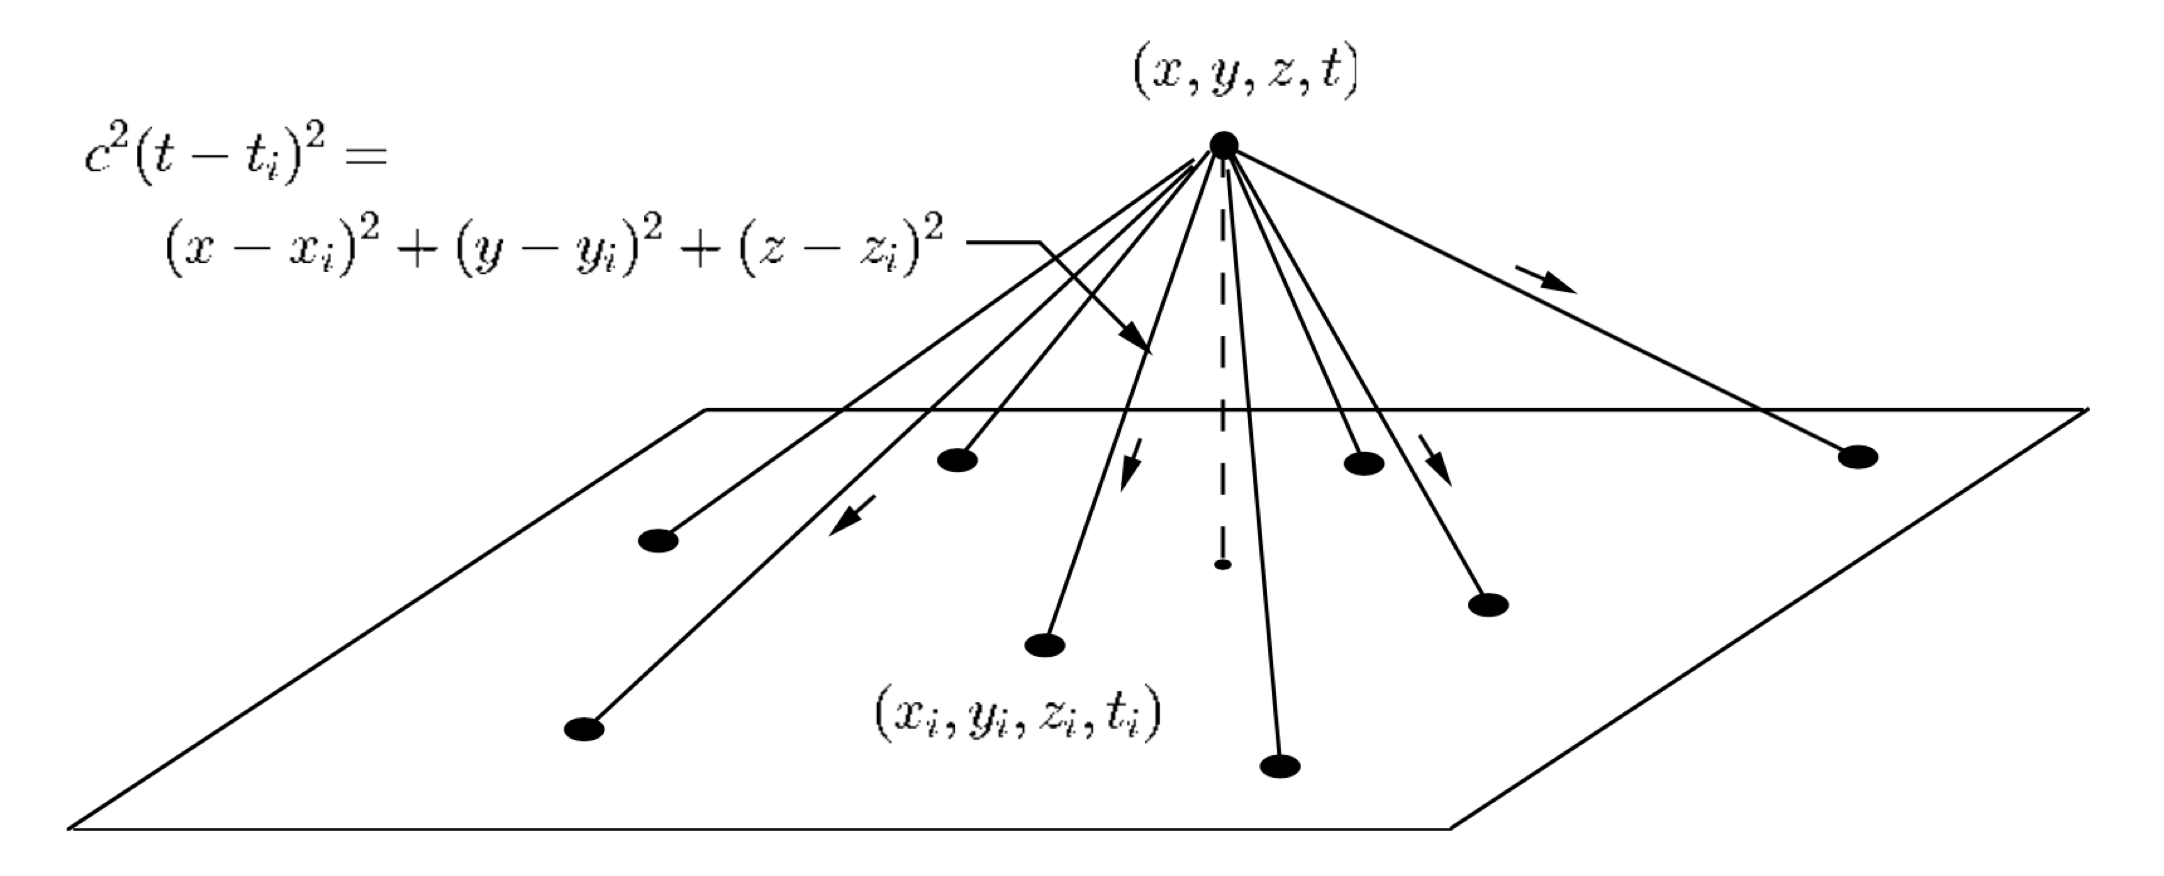

In [2]:
Image('./figs/lmahardware/TOAtriangulation.png')

Each LMA station has a **GPS antenna** whose very precise (~25 ns) one-pulse-per-second clock is used to **time the arrival** of these VHF pulses.

Below is a single VHF pulse (from [Shao and Krehbiel, 1996](https://dx.doi.org/10.1029/96JD01803). The little VHF bump you see in the figure below turns into a single VHF source in the final data!

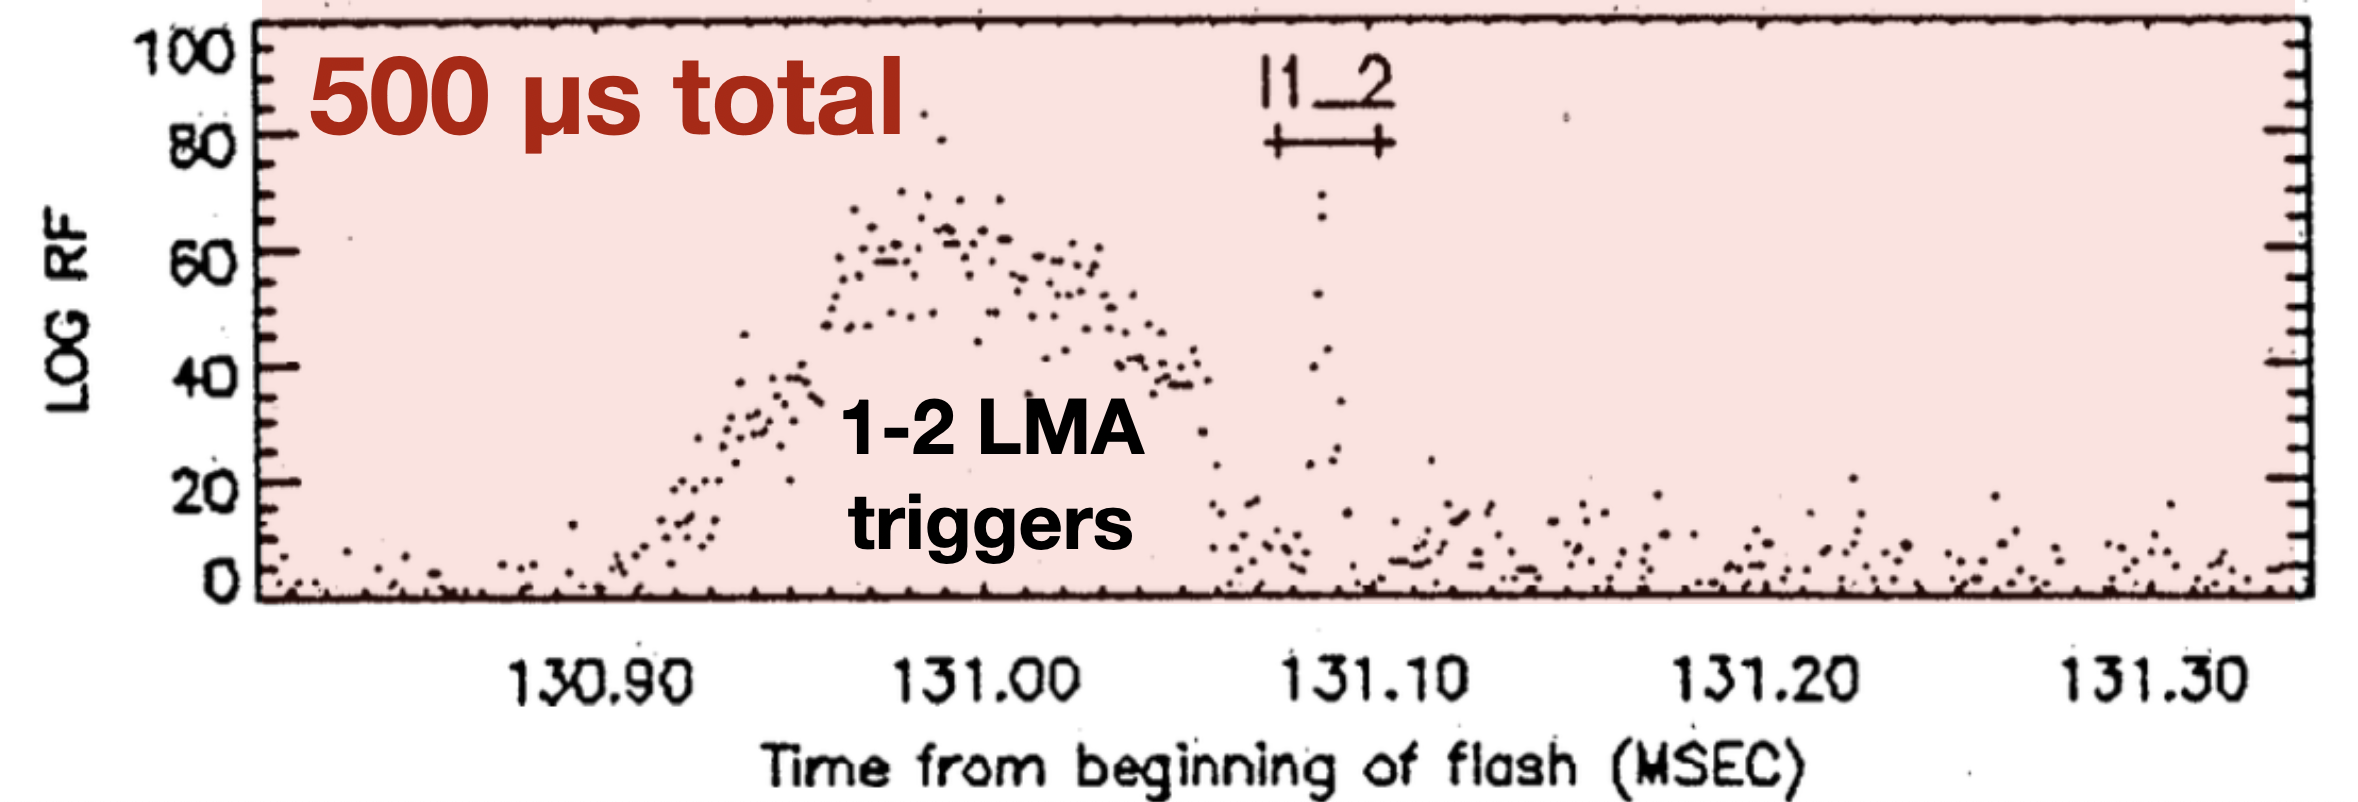

In [3]:
Image('./figs/lmahardware/vhfpulse.png')

The basic physics of the LMA's operation are described by the two figures above. The implementation and pratical processing as actually implemented are described below. These details turn out to be important for understanding measurement quality, and for operating the LMA at peak performance during a field campaign.

### From VHF pulse to digitized, timed trigger amplitude.

The VHF signal, including any lightning pulses, pass through the following sequence of hardware components and digitization operations.
1. Receive signal at antenna (top receieve element, 3 ground plane elements)
2. … through bandpass filter (60-66 MHz VHF band)
3. … through … premplifier 
4. … through another 60-66 MHz bandpass filter
5. … through low noise amplifier 
6. … and digitize the signal with a 25 MHz analog to digital converter (one sample every 40 ns)
7. Identify **largest pulse in an 80µs window** (max 12500 samples/sec)
8. Tag pulse with time at full 25 MHz sample rate, and save the count of all other pulses that broke threshold
9. Save each trigger to the **full-rate trigger file** saved on each station's hard drive in 10 min chunks (e.g. LG_WestTexas_Llano_210901_102000.dat) 
10. … and send all triggers to the `lma_decimate` program on station to find the largest pulse in a **400 µs window** (every fifth trigger) 
11. … and save a **realtime, decimated trigger file** in 1 min chunks.

The trigger files are stored in a binary (not plain text) format, and have data that looks like this:

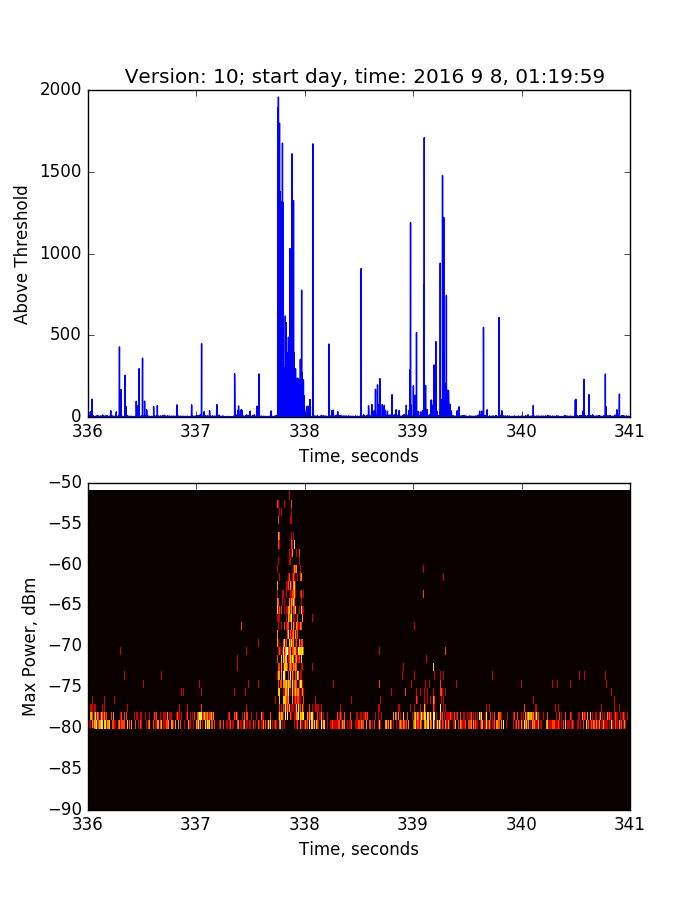

In [4]:
Image('./figs/lmahardware/LW_WestTexas_Llano_160908_012000.dat_dots.png')

Above: the contents of a few seconds of an LMA trigger file. It shows one very obvious lightning discharge just before 338 s; this happend to be a long-lasting discharge, which continued through 339 s.

Top: count of triggers above threshold in each 80 µs window.
Bottom: the power of the samples returned. Instead of plotting every trigger as a dot we show brighter shading that indicates triggers were recorded at that amplitude at that time. This plot shows that the station threshold was set to about -81 dBm in this case.

*Question*: How many times would the VHF pulse we showed from Shao and Krehbiel (1996) appear in the plot above?

*Fun fact*: The effective timing precision of the LMA is the GPS timing resolution of 25 ns, and not the 40ns sample rate of the digitizer, because uncoprrelated timing errors across all stations average out. See Fig. 9 in [Thomas et al. (2004)](10.1029/2004JD004549).

Above, we mentioned the stations's **threshold**. The LMA station monitors the power of the received pulses. The units are $\mathrm{dBm}= 10 \log_{10}[\frac{P}{1.0~\mathrm{mW}}]$, where $P$ is the received power in mW. Thresholds are typically range from -90 dBm (a very quiet site) to -70 dBm (a pretty noisy site). 

The source powers typically range from -10 to 50 dBW, so you can see they are much smaller once received at the station, as they should be given the $1/r^2$ law for radiative power as a function of distance $r$.

The threshold setting at each station determines the sensitivity of the network as a whole ([Chmielewski and Bruning 2016](https://dx.doi.org/10.1002/2016jd025159)).

The next figure shows (top) a histogram of all VHF source powers in the previous plot and (bottom) the number of triggers that exceeded the signal strength on the x axis.

The LMA automatically adjusts its threshold to receive 1000 triggers/sec, so in actual operations the threshold for the time below would slowly drift upward toward -76 dBm.

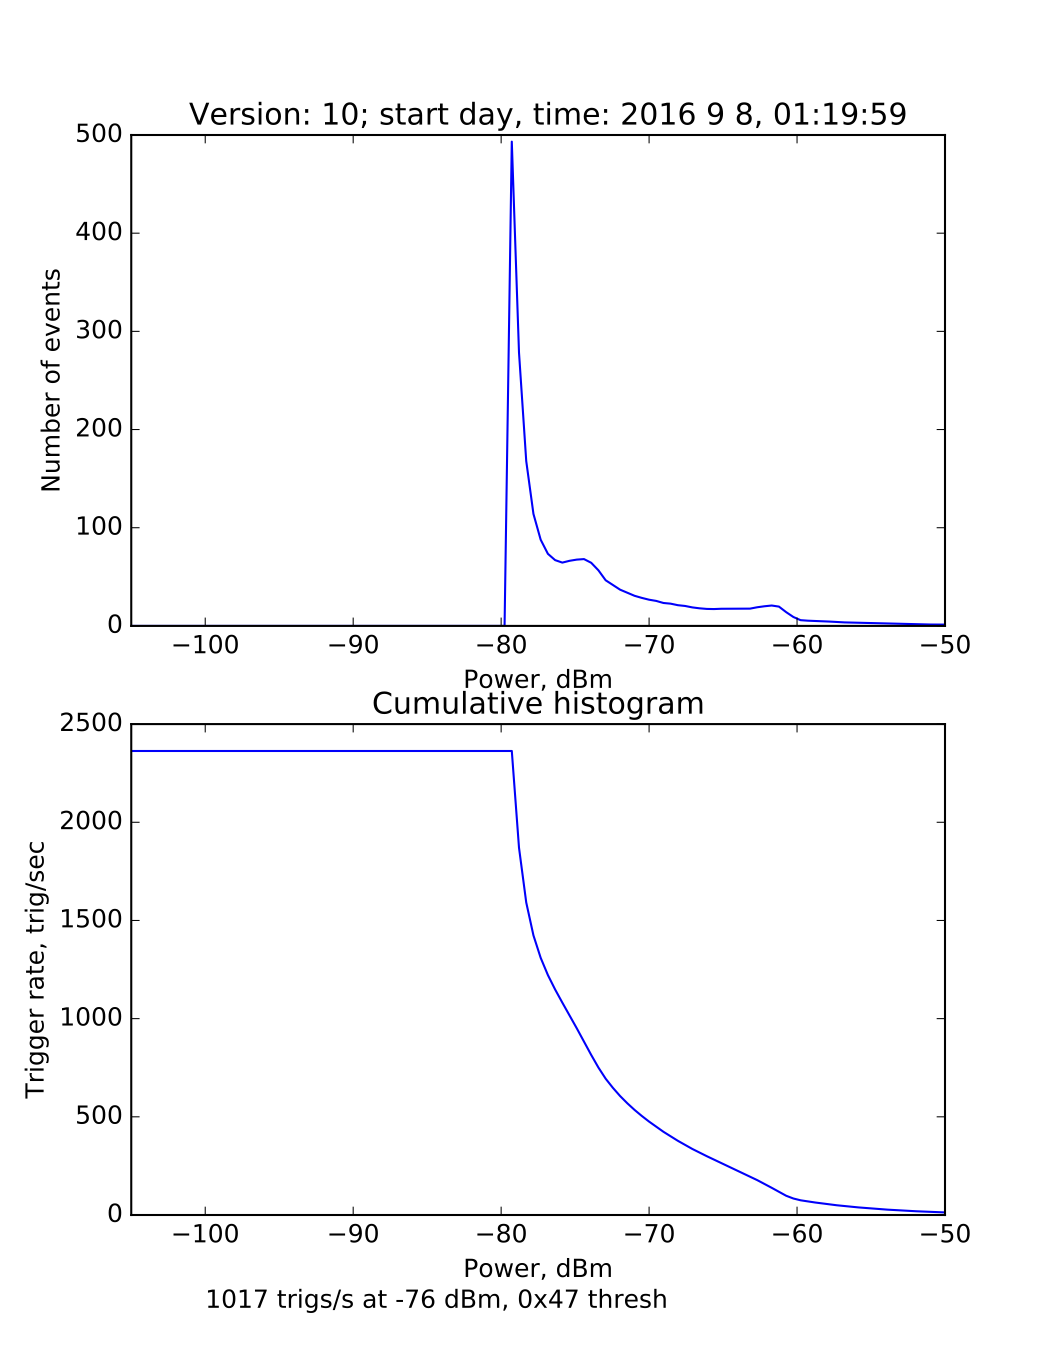

In [5]:
Image('./figs/lmahardware/LW_WestTexas_Llano_160908_012000.dat_thresh.png')

### Combining VHF triggers from all stations into source times and locations.

**Realtime mode**
Every 1 min, the realtime decimated trigger file is copied from each station to a central processing server. There, the `lma_analysis` program combines the triggers from all stations to produce **1 min decimated solution files**. These files are used to produce the figures on the **LMA web page**.

*Question*: what window length (in µs) was used on each station to select the triggers used to create the real-time solutions?

**Postprocessing mode**
Because the 10 min, full quality trigger files are much larger, they are copied back manually once per day (or after a site visit) and combined in post-processeing into **full-quality solution files**. These are the data **files to use for research**.

*Question*: what window length (in µs) was used on each station to select the triggers used to create the post-processed solutions?

The post-processed file format is the same as the 1 min decimated solution file format is same as 10 min full quality file format. Let's [look at that file format](./LMAsourcefiles.ipynb) next.